<a href="https://colab.research.google.com/github/lophiraalata/data-analytics-micro-credential/blob/assignments/IH_Unit4_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project : Diabetes Classification

You will be working on a machine learning project using data from the UCI Machine Learning
Repository.

The dataset is located at:

https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008 (google
UCI Diabetes dataset)

Diabetes 130-US hospitals for years 1999-2008 Data Set

"""The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
 * (1) It is an inpatient encounter (a hospital admission).
 * (2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
 * (3) The length of stay was at least 1 day and at most 14 days.
 * (4) Laboratory tests were performed during the encounter.
 * (5) Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.
"""

# 1.0. Problem Statement

#### Your goal is to make a classification model that can be used to predict something within the dataset.

For example, you can choose to predict whether a patient is likely to be a readmit in the
hospital within 30days.

You can choose which features to use in your model (race, gender, age, etc.) and train your model.

Your project should include a description of what you’re trying to accomplish, EDA, data
wrangling, model creation, model evaluations, and model selections.

Your analytics should include at least 2 different types of models (i.e. KNN and Random Forest).

# 2.0. Load the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
sns.set()
import plotly.express as px
from copy import copy
import tensorflow as tf
from tensorflow import keras
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go

# 3.0. Load the data

In [2]:
!wget https://raw.githubusercontent.com/lophiraalata/ML-Data/main/diabetic_data.csv

--2022-08-02 21:30:41--  https://raw.githubusercontent.com/lophiraalata/ML-Data/main/diabetic_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19159383 (18M) [text/plain]
Saving to: ‘diabetic_data.csv’

diabetic_data.csv   100%[===================>]  18.27M  --.-KB/s    in 0.1s    

2022-08-02 21:30:42 (123 MB/s) - ‘diabetic_data.csv’ saved [19159383/19159383]



In [4]:
diabetes = pd.read_csv('diabetic_data.csv')

# 4.0. Exploratory Data Analysis (EDA)

In [6]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
diabetes.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [12]:
diabetes.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
diabetes.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [10]:
diabetes.isnull()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
diabetes.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

In [26]:
diabetes.shape

(101766, 50)

In [16]:
diabetes['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [29]:
diabetes['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [17]:
diabetes['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [27]:
diabetes['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

# 5.0. Data Visualization

In [ ]:
pi chart?

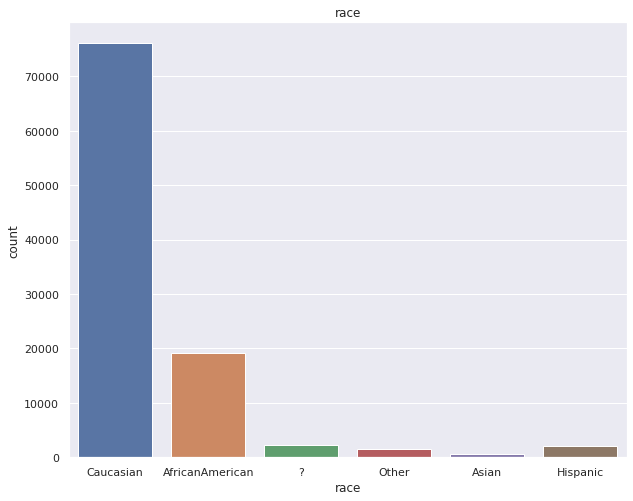

race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64


In [30]:
plt.figure(figsize=(10,8))
sns.countplot(x=diabetes.race, data = diabetes)
plt.title('race')
plt.show()

print('race')
print(diabetes.race.value_counts(normalize = True)*100)

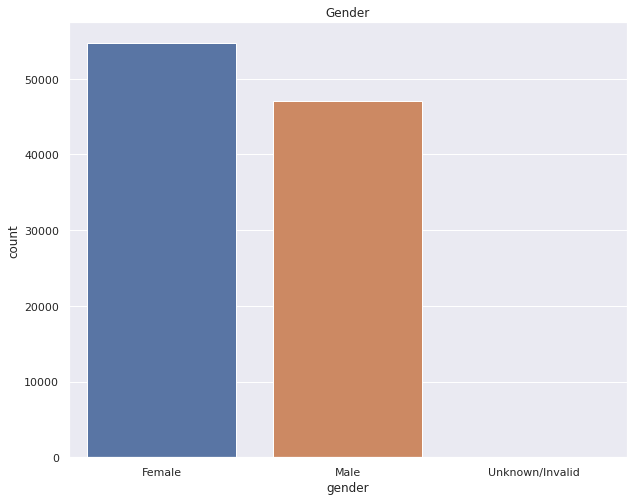

Gender
Female             53.758623
Male               46.238429
Unknown/Invalid     0.002948
Name: gender, dtype: float64


In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x=diabetes.gender, data = diabetes)
plt.title('Gender')
plt.show()

print('Gender')
print(diabetes.gender.value_counts(normalize = True)*100)

In [13]:
# sns.pairplot(diabetes,hue='readmitted',palette='coolwarm')

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f39e7c5ab00> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=diabetes.time_in_hospital, data = diabetes)

# 6.0. Perform Train Test Split 

In [ ]:
# 7.0 